

#**THE CHAPLIN’S ENSEMBLE**


**MEMBERS**:

1. Eltonjohn Oketch

2. Brendon Achoki

3. Jonah Okiru

4. Lydia Obare

5. Ruth Mwaura

6. Elizabeth Kihungi



## 1. Define the question.

### a) Specifying the question.

Build a machine learning model that will help to classify the customers questions as Humorous and Non humorous and if humorous, indicate the reasons why the customers question was so.

### b) The Metric of success.

Building a model with an accuracy of not less than 90% and deploy this model on streamlit.

### c) Understanding the contest.
According to corporate surveys, we have determined that some products have bias in PQA platforms where they attract more humorous questions than others.  
Naturally, humorous questions are an  integral part of PQAs(Product Question Answering platforms) systems. These are web service systems which enable users to post questions and get feedback regarding certain products. Some products attract humor due to their unreasonable price, their peculiar functionality, or in cases that users emphasize their critical point-of-view through humor. 

### d) Recording the experimental design.

Hypothesis: Classify the customer question on a product as either humorous or Non humorous.

X-Axis: The questions.

y-Axis: The class labels (0, 1)

Experimental setup: Classify the questions on the product as either humoros(1) and non humoros(0) based on the questions customers asked about the product.

Design of the Experiment: Analyze 27916 asked by the customers about avarious products.

Sample size: 27916 questions.

## 2 Import the required Libraries.

In [ ]:
#IMPORTS
import pandas as pd
import numpy as np 
import pl


# import tensorflow as tf
# from tensorflow.keras.layers import Dense, Flatten
# from tensorflow.keras import Model

## 3.Data loading.

### Loading the data

In [ ]:
url='https://humor-detection-pds.s3-us-west-2.amazonaws.com/Humorous.csv'

url1='https://humor-detection-pds.s3-us-west-2.amazonaws.com/Non-humours-biased.csv'

url2='https://humor-detection-pds.s3-us-west-2.amazonaws.com/Non-humorous-unbiased.csv'

#reading the datasets
def read (data):
  return pd.read_csv(data)

humorous=read(url)

biased=read(url1)

unbiased=read(url2)



### preview the data

In [ ]:
#previewing the datasets
#dataset1 first 5 rows
humorous.head()

,question,product_description,image_url,label
0,Will the volca sample get me a girlfriend?,Korg Amplifier Part VOLCASAMPLE,http://ecx.images-amazon.com/images/I/81I1XZea...,1
1,Can u communicate with spirits even on Saturday?,Winning Moves Games Classic Ouija,http://ecx.images-amazon.com/images/I/81kcYEG5...,1
2,I won't get hunted right?,Winning Moves Games Classic Ouija,http://ecx.images-amazon.com/images/I/81kcYEG5...,1
3,I have a few questions.. Can you get possessed...,Winning Moves Games Classic Ouija,http://ecx.images-amazon.com/images/I/81kcYEG5...,1
4,Has anyone asked where the treasure is? What w...,Winning Moves Games Classic Ouija,http://ecx.images-amazon.com/images/I/81kcYEG5...,1


In [ ]:
#dataset1 the last 5 rows
humorous.tail()

,question,product_description,image_url,label
9566,l need the ruber well nut for replacement,Puig 5051F Dark Smoke New Generation Windshield,http://ecx.images-amazon.com/images/I/71cuiSDy...,1
9567,can this pc cure cancer,SkyTech Supremacy Gaming Computer PC Desktop -...,http://ecx.images-amazon.com/images/I/91lPP0C9...,1
9568,Is tgis the product back on shark tank?,Rapid Tone Ultra Weight Loss Supplement - Extr...,http://ecx.images-amazon.com/images/I/71s+DyOu...,1
9569,any one else try? is it as good as they said o...,Essence PH Skin Cream 0.5 fl oz/15ml,http://ecx.images-amazon.com/images/I/41-nA6Ot...,1
9570,Is this brush set made with animal furs at all...,10 Piece Kabuki Contouring Makeup Brush Set wi...,http://ecx.images-amazon.com/images/I/713bRd40...,1


In [ ]:
#dataset2 first 5 rows
biased.head()

,question,product_description,image_url,label
0,What is the size range of these patterns,The Colette Sewing Handbook: 5 Fundamentals fo...,https://www.amazon.co.uk/ask/questions/Tx355VH...,0
1,Are the instructions in uk or us terms?,Absolutely Gorgeous Doilies,https://www.amazon.co.uk/ask/questions/Tx3IRRI...,0
2,Is this manual good for 2014 model c3,Citroen C3 Petrol & Diesel Service and Repair ...,https://www.amazon.co.uk/ask/questions/Tx3S1FO...,0
3,Hello does the light have adjustable brightness?,Mighty Bright Blue Xtraflex 2 LED Book Light,https://www.amazon.co.uk/ask/questions/Tx38TXK...,0
4,Will these inks work with the wf-7720dtwf model?,24 High Capacity ink cartridge to Replace 27XX...,https://www.amazon.co.uk/ask/questions/Tx1IVEI...,0


In [ ]:
#dataset2 the last 5 rows
biased.tail()

,question,product_description,image_url,label
9566,Does the 68lm 6 inch give an audible alarm if ...,Garmin Nuvi 68LM 6 inch Satellite Navigation w...,https://www.amazon.co.uk/ask/questions/Tx1IVDN...,0
9567,Do you need 2 phone sockets / connection boxes...,iDECT Eclipse Plus Dect Phone with Call Blocke...,https://www.amazon.co.uk/ask/questions/TxI4UJL...,0
9568,I buy it on 05.11.2015 and today my usb device...,SanDisk SDCZ43-128G-G46 Ultra Fit 128 GB USB F...,https://www.amazon.co.uk/ask/questions/Tx3ORN8...,0
9569,Hi What is the warranty period on this? I noti...,SanDisk SDCZ43-128G-G46 Ultra Fit 128 GB USB F...,https://www.amazon.co.uk/ask/questions/Tx3AM5L...,0
9570,can you use proper golf balls,Haack Golf Net By SEC Coach Chris Haack by Rukket,https://www.amazon.co.uk/ask/questions/Tx2NNFV...,0


In [ ]:
#dataset3 first 5 rows
unbiased.head()

,question,product_description,image_url,label
0,Is AudioPocket only for iPhone (recording soun...,Korg Amplifier Part VOLCASAMPLE,http://ecx.images-amazon.com/images/I/81I1XZea...,0
1,Standard shipping takes how long?,Winning Moves Games Classic Ouija,http://ecx.images-amazon.com/images/I/81kcYEG5...,0
2,Can I use this my self?,Winning Moves Games Classic Ouija,http://ecx.images-amazon.com/images/I/81kcYEG5...,0
3,If the felt comes off the guide can I return i...,Winning Moves Games Classic Ouija,http://ecx.images-amazon.com/images/I/81kcYEG5...,0
4,Does it acually work?,Winning Moves Games Classic Ouija,http://ecx.images-amazon.com/images/I/81kcYEG5...,0


In [ ]:
#dataset3 the last 5 rows
unbiased.tail()

,question,product_description,image_url,label
9566,Serve na f800r 2013?,Puig 5051F Dark Smoke New Generation Windshield,http://ecx.images-amazon.com/images/I/71cuiSDy...,0
9567,Can it run mine sweeper abve 10 fps?,SkyTech Supremacy Gaming Computer PC Desktop -...,http://ecx.images-amazon.com/images/I/91lPP0C9...,0
9568,What is the difference between the pro weight ...,Rapid Tone Ultra Weight Loss Supplement - Extr...,http://ecx.images-amazon.com/images/I/71s+DyOu...,0
9569,Can you provide me a phone number to the compa...,Essence PH Skin Cream 0.5 fl oz/15ml,http://ecx.images-amazon.com/images/I/41-nA6Ot...,0
9570,Is the blenders sponge latex free?,10 Piece Kabuki Contouring Makeup Brush Set wi...,http://ecx.images-amazon.com/images/I/713bRd40...,0


## 4.Combining the datasets.

In [ ]:
#defining the function to combine the datasets

def combine  (df1,df2):
  return pd.concat([df1,df2], ignore_index=True, axis=0)
  
data1= combine(humorous, biased)
#Combine data1 and unbiased dataset
data2=combine(data1, unbiased)
#preview the combined data
data2.head(4)





,question,product_description,image_url,label
0,Will the volca sample get me a girlfriend?,Korg Amplifier Part VOLCASAMPLE,http://ecx.images-amazon.com/images/I/81I1XZea...,1
1,Can u communicate with spirits even on Saturday?,Winning Moves Games Classic Ouija,http://ecx.images-amazon.com/images/I/81kcYEG5...,1
2,I won't get hunted right?,Winning Moves Games Classic Ouija,http://ecx.images-amazon.com/images/I/81kcYEG5...,1
3,I have a few questions.. Can you get possessed...,Winning Moves Games Classic Ouija,http://ecx.images-amazon.com/images/I/81kcYEG5...,1


In [ ]:
#Shaffle the data2
from sklearn.utils import shuffle
df = shuffle(data2).reset_index()


## 5.Checking the data.

In [ ]:
#Drop the index
df.drop(['index'], axis=1, inplace=True)

In [ ]:
#Preview the top of the data
df.head()

,question,product_description,image_url,label
0,Where is hat made?,W4W Trump - Make America Great Again 3D Embroi...,http://ecx.images-amazon.com/images/I/51Hbcjq-...,0
1,Does this fit the nike apple watch,YANCH Compatible with for Apple Watch Band 38m...,http://ecx.images-amazon.com/images/I/31B636pm...,0
2,Can it be free return if does not fit correctly?,Rabbitgoo Dog Harness No-Pull Pet Harness Adj...,http://ecx.images-amazon.com/images/I/51LdTpYR...,0
3,Is the old lady included?,RoomyRoc Mobile Laptop Desk/Cart/Stand with Ad...,http://ecx.images-amazon.com/images/I/71Fmh7ew...,1
4,Can I wear it in salt water (beach) ?,[ Low Season Muslim Islamic Hijab Swimwear Mod...,http://ecx.images-amazon.com/images/I/51cdVj+L...,0


In [ ]:
#Preview the bottom of the data
df.tail()

,question,product_description,image_url,label
28708,Is the glass real glass or plastic glass?,FRAMES BY POST H7 Picture Photo Frame Wood Bla...,https://www.amazon.co.uk/ask/questions/Tx1OBFA...,0
28709,Is the fruit waste bin dry i.e. Does it really...,Philips HR1867/21 Viva Collection Quick Clean ...,https://www.amazon.co.uk/ask/questions/Tx27DQ3...,0
28710,Can it beat a skull lol,BladesUSA SW-722 Ninja Sword 46-Inch Overall D...,http://ecx.images-amazon.com/images/I/41-iF5ov...,1
28711,would it fit in my mb fm2-a55-e33and its fm2?,Zalman CNPS10X Optima Heatsink and Fan,https://www.amazon.co.uk/ask/questions/Tx21MNZ...,0
28712,i can't stop laughing,Mens Goatee Shaving Template | Create a Perfec...,http://ecx.images-amazon.com/images/I/71kpqSoX...,1


In [ ]:
#check the data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28713 entries, 0 to 28712
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   question             28713 non-null  object
 1   product_description  28665 non-null  object
 2   image_url            28031 non-null  object
 3   label                28713 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 897.4+ KB


The datasets has atotal of 28713 customer inquiries and four columns.

In [ ]:
#Describe the data
# Printing the unique values
columns = df.columns
for i in columns:
  print('Unique values in', i , 'are :')
  print(df[i].unique())
  print('number of unique values',len(df[i].unique()))
  print('                                                                           ')
  print('***************************************************************************')

Unique values in question are :
['Where is hat made?' 'Does this fit the nike apple watch'
 'Can it be free return if does not fit correctly?' ...
 'Can it beat a skull lol' 'would it fit in my mb fm2-a55-e33and its fm2?'
 "i can't stop laughing"]
number of unique values 27916
                                                                           
***************************************************************************
Unique values in product_description are :
['W4W Trump - Make America Great Again 3D Embroidery American Flag Baseball Cap Camo'
 'YANCH Compatible with for Apple Watch Band 38mm 40mm Soft Silicone Sport Band Replacement Wrist Strap Compatible with for iWatch Nike+SportEditionS/MWhite'
 'Rabbitgoo  Dog Harness No-Pull Pet Harness Adjustable Outdoor Pet Vest 3M Reflective Oxford Material Vest for Dogs Easy Control for Small Medium Large Dogs (Green L)'
 ... 'Hycote White Primer  400ml'
 'FRAMES BY POST H7 Picture Photo Frame Wood Black with White Mount A4 Image Siz

From the above results, the number of products is 12686.

### 6.Data cleaning.

In [ ]:
#Check the missing values in the dataset
df.isnull().sum()

question                 0
product_description     48
image_url              682
label                    0
dtype: int64

The column with missing values are the column of product description and the column of image-url. The other columns of question and label doesn't contain any missing values.

In [ ]:
#Dealing with missing values
#The missing values column would be dropped as they are irrellevant in the modelling.
df.drop(['product_description', 'image_url'], axis=1, inplace=True)

In [ ]:
#Checking and drop the duplicates
duplicate=df[df.duplicated()]
#preview the duplicated
duplicate.value_counts()


question                                                                                label
Does the girl come with it?                                                             1        15
Where is it made?                                                                       0        13
Does it come with the girl?                                                             1        12
Where is this made?                                                                     0        11
How big is it?                                                                          0         8
                                                                                                 ..
How many of these to build a 360 degree set up?                                         0         1
How many mg of Caffeine is in each can?                                                 0         1
How many did you eat and how soon after eating did you have your instestinal exorcism?  1         1
How ma

In [ ]:
#Drop the duplicates
df.drop_duplicates(inplace=True)

## 7.Preprocessing.

In [ ]:
#Removing punctuations
df['question'] = df['question'].str.replace('[^\w\s]', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


From the above code, the punctuations marks was dropped, as part of preprocessing the data, since they're of know use.

In [ ]:
#Change the the characters in the question to lower case
df['question']= df['question'].apply(lambda x: x.lower())

In [ ]:
# df['question']=df['question'].apply(str)

The code above converts the characters in the question columns to lower case.

In [ ]:
#Make  acopy to be used in sentiment analysis
df_copy=df.copy()

In [ ]:
#Tokenization of the texts
!pip install transformers
from transformers import AutoTokenizer
tokenizer=AutoTokenizer.from_pretrained('bert-base-uncased')

     |████████████████████████████████| 4.2 MB 8.8 MB/s 
     |████████████████████████████████| 6.6 MB 7.7 MB/s 
     |████████████████████████████████| 84 kB 2.9 MB/s 
     |████████████████████████████████| 596 kB 34.5 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

In [ ]:
df.dtypes

question    object
label        int64
dtype: object

In [ ]:
#NLT the the words
!pip install nltk
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
df['question'] = df['question'].apply(nltk.word_tokenize)
# df['question']= word_tokenize(df['question'])
df.head

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


<bound method NDFrame.head of                                                 question  label
0                                 [where, is, hat, made]      0
1             [does, this, fit, the, nike, apple, watch]      0
2      [can, it, be, free, return, if, does, not, fit...      0
3                         [is, the, old, lady, included]      1
4             [can, i, wear, it, in, salt, water, beach]      0
...                                                  ...    ...
28708  [is, the, glass, real, glass, or, plastic, glass]      0
28709  [is, the, fruit, waste, bin, dry, ie, does, it...      0
28710                     [can, it, beat, a, skull, lol]      1
28711  [would, it, fit, in, my, mb, fm2a55e33and, its...      0
28712                          [i, cant, stop, laughing]      1

[27930 rows x 2 columns]>

In [ ]:
#Remove stop words
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
#defining the function to remove stopwords from tokenized text
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#applying the function
df['question']= df['question'].apply(lambda x:remove_stopwords(x))

In [ ]:
#Lemmatization
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()
#defining the function for lemmatization
def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text

df['question']=df['question'].apply(lambda x:lemmatizer(x)) 



[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
#

In [ ]:
#Import tensor flow library
import tensorflow as tf
#Import tokenizer for converting words to numerical form
from tensorflow.keras.preprocessing.text import Tokenizer
# converting  sentences into max_length format by adding zeros 
from tensorflow.keras.preprocessing.sequence import pad_sequences 

In [ ]:
#Initializing variables for the model
vocab_size = 10000
embedding_dim = 16 #
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

In [ ]:
#Convert data to json formart
import json
df.to_json(r'Name.json', orient="records")
with open("/content/Name.json", 'r') as f:
    data = json.load(f)
data


[{'label': 0, 'question': ['hat', 'made']},
 {'label': 0, 'question': ['fit', 'nike', 'apple', 'watch']},
 {'label': 0, 'question': ['free', 'return', 'fit', 'correctly']},
 {'label': 1, 'question': ['old', 'lady', 'included']},
 {'label': 0, 'question': ['wear', 'salt', 'water', 'beach']},
 {'label': 0,
  'question': ['8x',
   'velcro',
   'microfibre',
   'multicolour',
   'pad',
   'fit',
   's3svax']},
 {'label': 1,
  'question': ['unicorn',
   'become',
   'zombie',
   'zombie',
   'unicorn',
   'meat',
   'used',
   'accidentally',
   'canned',
   'product',
   'craving',
   'brain']},
 {'label': 1, 'question': ['charge', 'credit', 'card']},
 {'label': 0, 'question': ['long', 'battery', 'life']},
 {'label': 0,
  'question': ['lithium', 'ion', 'battery', 'replaceable', 'thank']},
 {'label': 0,
  'question': ['advice',
   'get',
   'cutter',
   'run',
   'smooth',
   'rule',
   'mine',
   'stick',
   'wont',
   'slide']},
 {'label': 0, 'question': ['husband', '6', '2', 'wear', 'siz

In [ ]:
questions = []
labels = []

for item in data:
    questions.append(item["question"])
    labels.append(item["label"])


In [ ]:
#Split the data into train and test
training_questions = questions[0:training_size]
testing_questions = questions[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]



In [ ]:
#Tokenizing data
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_questions)

word_index = tokenizer.word_index
#Sequencing and padding the data
training_sequences = tokenizer.texts_to_sequences(training_questions)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_questions)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
testing_sequences

[[18, 4447, 57, 129],
 [16, 98],
 [123, 4614, 6339, 17, 22, 47, 116, 136, 8254],
 [7541, 3471],
 [1360, 653, 1, 330],
 [10, 1, 51, 1, 7055],
 [1],
 [145, 624, 6272, 20, 451, 922, 111, 424, 111, 41],
 [1, 299, 5, 1425, 3844, 7604, 49],
 [851, 425, 440, 277, 425, 1, 114, 250, 20, 4095, 1081],
 [327, 324, 77, 961, 714, 1, 1],
 [29],
 [2, 5412, 1],
 [4, 1, 44],
 [277, 1, 1213, 767, 103],
 [19, 203, 195, 21, 695],
 [200, 1, 1457, 1942, 32, 60, 33, 1, 228, 294, 3, 4],
 [193, 1143, 4122, 2308],
 [230, 376, 6036, 875, 181],
 [559],
 [6, 3690, 347, 13, 61, 45, 347, 253, 10, 52, 3498, 985],
 [6016],
 [50, 134, 5, 1, 286],
 [4204, 171],
 [19, 2, 1, 1113, 104],
 [904, 444, 14],
 [1, 678, 58, 1],
 [231, 426, 1990, 1, 54],
 [898, 1, 1054],
 [3394],
 [31, 1],
 [5, 939, 113, 107, 1, 2556, 185, 1212, 1, 775, 1],
 [93, 203, 32, 311, 9517],
 [1520, 48, 1435, 1],
 [19, 3, 14, 54, 1, 77, 242],
 [2791, 75, 1, 1170, 3874, 2424],
 [53, 164, 1, 377, 78, 131, 8, 2004, 78],
 [24, 5916],
 [4499, 1384, 324],
 [161

In [ ]:
#Convert the padded train and tests into number arrays
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [ ]:
#Building the model 
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
#Compile the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
#Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           160000    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#

In [ ]:
#Fitting our model to the training data
num_epochs = 20
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/20
625/625 - 10s - loss: 0.6323 - accuracy: 0.6725 - val_loss: 0.6263 - val_accuracy: 0.6665 - 10s/epoch - 16ms/step
Epoch 2/20
625/625 - 5s - loss: 0.5564 - accuracy: 0.7038 - val_loss: 0.4624 - val_accuracy: 0.8059 - 5s/epoch - 8ms/step
Epoch 3/20
625/625 - 5s - loss: 0.3809 - accuracy: 0.8414 - val_loss: 0.3859 - val_accuracy: 0.8381 - 5s/epoch - 8ms/step
Epoch 4/20
625/625 - 5s - loss: 0.3158 - accuracy: 0.8710 - val_loss: 0.3711 - val_accuracy: 0.8427 - 5s/epoch - 7ms/step
Epoch 5/20
625/625 - 4s - loss: 0.2813 - accuracy: 0.8867 - val_loss: 0.3792 - val_accuracy: 0.8429 - 4s/epoch - 6ms/step
Epoch 6/20
625/625 - 5s - loss: 0.2561 - accuracy: 0.8976 - val_loss: 0.3737 - val_accuracy: 0.8488 - 5s/epoch - 8ms/step
Epoch 7/20
625/625 - 3s - loss: 0.2374 - accuracy: 0.9055 - val_loss: 0.3773 - val_accuracy: 0.8483 - 3s/epoch - 5ms/step
Epoch 8/20
625/625 - 3s - loss: 0.2206 - accuracy: 0.9131 - val_loss: 0.3893 - val_accuracy: 0.8441 - 3s/epoch - 5ms/step
Epoch 9/20
625/625 - 

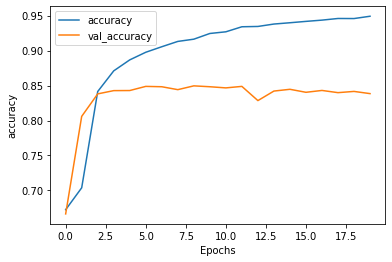

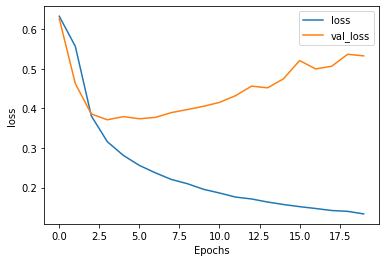

In [ ]:
#Visualization
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

## 8.Sentiment analysis

In [ ]:
#Sentiment Analysis
from transformers import pipeline
classifier = pipeline('sentiment-analysis') 
results = classifier(list(df_copy['question']))
results

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/255M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

[{'label': 'NEGATIVE', 'score': 0.9735258221626282},
 {'label': 'POSITIVE', 'score': 0.9706032276153564},
 {'label': 'NEGATIVE', 'score': 0.998572587966919},
 {'label': 'POSITIVE', 'score': 0.9907925128936768},
 {'label': 'POSITIVE', 'score': 0.9918335676193237},
 {'label': 'NEGATIVE', 'score': 0.7778956890106201},
 {'label': 'NEGATIVE', 'score': 0.9995524287223816},
 {'label': 'NEGATIVE', 'score': 0.9445557594299316},
 {'label': 'NEGATIVE', 'score': 0.9958589673042297},
 {'label': 'NEGATIVE', 'score': 0.9872841835021973},
 {'label': 'POSITIVE', 'score': 0.9617239236831665},
 {'label': 'POSITIVE', 'score': 0.987423837184906},
 {'label': 'NEGATIVE', 'score': 0.9992135763168335},
 {'label': 'NEGATIVE', 'score': 0.998589813709259},
 {'label': 'NEGATIVE', 'score': 0.9982838034629822},
 {'label': 'NEGATIVE', 'score': 0.9762767553329468},
 {'label': 'POSITIVE', 'score': 0.9850430488586426},
 {'label': 'NEGATIVE', 'score': 0.9996229410171509},
 {'label': 'NEGATIVE', 'score': 0.997349500656127

In [ ]:
#Get sentiment list and apppend into a new sentiment column.
sents = []
scores=[]
for pair in results:
  for key, value in pair.items():
    sents.append(value)

for val in sents:

  if type(val) == float:
    scores.append(val)
    sents.remove(val)  
sents
df_copy['sentiment'] = sents

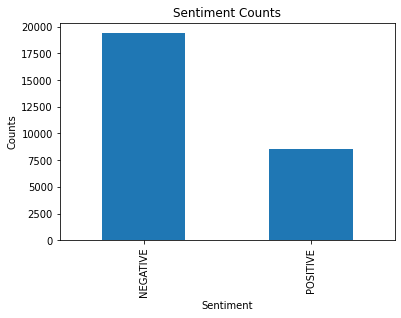

In [ ]:
# count of positive and negative sentiments
import matplotlib.pyplot as plt

df_copy['sentiment'].value_counts().plot.bar()
plt.title('Sentiment Counts')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
plt.show()

In [ ]:
#Preview
df_copy.head(3)

,question,label,sentiment
0,where is hat made,0,NEGATIVE
1,does this fit the nike apple watch,0,POSITIVE
2,can it be free return if does not fit correctly,0,NEGATIVE


In [ ]:
#Convert the scores into array
scores=np.array(scores)
#Calculate the of scores
np.mean(scores)

0.952414688044366

Our sentiment analysis model has an average accuracy of 95.24%.

## 9.Feature Engineering.

In [ ]:
#Feature engineering

In [ ]:
# Due to time complexity of the model, we will test this on the first random 140 records of our data
classes = []
df_shuffle = shuffle(df_copy)
df_split = np.array_split(df_shuffle, 200)
chunk = list(df_split[0]['question'])
zero_shot = pipeline('zero-shot-classification')
input_text = chunk
candidate_labels = ['quality', 'price', 'quantity', 'delivery', 'service', 'location']
classifier = zero_shot(input_text, candidate_labels, multi_label=False)
classes.append(classifier)

No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


Downloading:   0%|          | 0.00/1.13k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.52G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

## 10.Model deployment

In [ ]:
#deployment
import pickle
file_name='trained_model.sav'
pickle.dump(zero_shot, open(file_name, 'wb'))

#load the saved model
loaded_model=pickle.load(open('trained_model.sav', 'rb'))

In [ ]:
#Input data
input_data="why is so expensive"
prediction=loaded_model(input_data, candidate_labels, multi_label=False)
#printout of the prediction
print(prediction)

{'sequence': 'why is so expensive', 'labels': ['price', 'quantity', 'service', 'quality', 'delivery', 'location'], 'scores': [0.7819085717201233, 0.055682167410850525, 0.0540095679461956, 0.05019158869981766, 0.0306701622903347, 0.02753797546029091]}


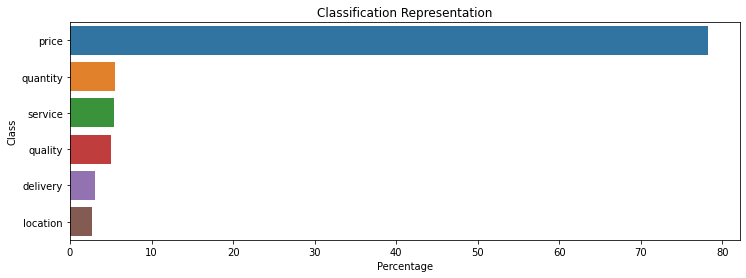

In [ ]:
#Visualization
import seaborn as sns
# convert scores to percentages
for i, x in enumerate(prediction['scores']):
  prediction['scores'][i] = x * 100

plt.figure(figsize=(12,4))
sns.barplot(x = prediction['scores'], y = prediction['labels'], orient='horizontal')
plt.title('Classification Representation')
plt.xlabel('Percentage')
plt.ylabel('Class')
plt.show()

# 11.Challenging the solution.

Even though our model managed to achieve the accuracy score of 83%, the model accuracy score stills lies below the set metric of success for the model of 90%.

## 12 Follow up question.

## a) Did we have the right data

No, since the part of data that gives reasons why the customer classify the question as humorous or non humorous was missing. Due to these we had to do some features engineering to cater for the missing part.

## b)Do we need another data.

Yes, another data is needed and it should include the missing section of the data so that we inhibit the features engineering on the data.

## c)Did we have the right question.

Yes, the question and the objective were clear.